# Data Analysis

This notebook contains data analysis and exploration.


## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the data
df = pd.read_csv('../datasets/BMW-sales-data-2010-2024.csv')
print(f"Data loaded: {len(df)} rows, {len(df.columns)} columns")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst rows:")
df.head()

Data loaded: 50000 rows, 11 columns

Columns: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

First rows:


Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low

## Price Analysis: Selling Price Based on Vehicle Characteristics

Investigate using appropriate charts how the selling price of a BMW (column Price_USD) changes based on its characteristics. In particular, price vs. year of manufacture and mileage.


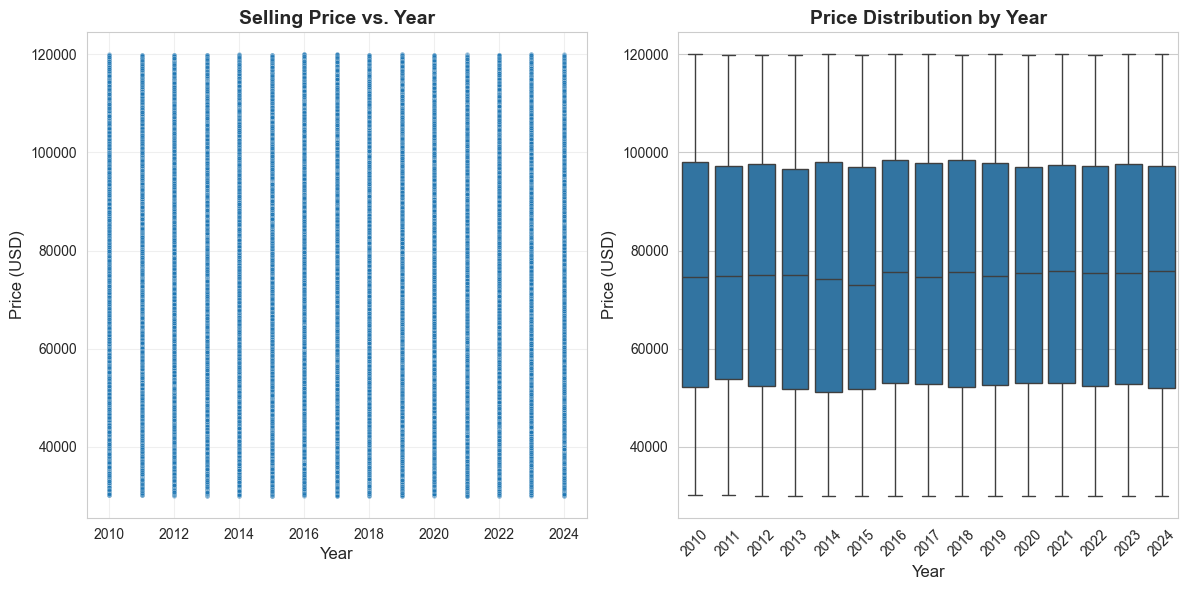


Average price per year:
    Year     Price_USD
0   2010  75072.215916
1   2011  75293.276388
2   2012  75019.567227
3   2013  74535.908298
4   2014  74556.535224
5   2015  74049.552710
6   2016  75543.540862
7   2017  75173.147416
8   2018  75455.480781
9   2019  75194.426002
10  2020  75057.667083
11  2021  75399.277580
12  2022  74967.875503
13  2023  75194.004660
14  2024  75025.852933


In [2]:
# Price Analysis: Selling Price vs. Year of Manufacture
# ============================================

# Scatter Plot: Price vs. Year
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Year', y='Price_USD', alpha=0.5, s=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Selling Price vs. Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Box Plot: Price by Year
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Year', y='Price_USD')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Price Distribution by Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price per year
avg_price_by_year = df.groupby('Year')['Price_USD'].mean().reset_index()
print("\nAverage price per year:")
print(avg_price_by_year)


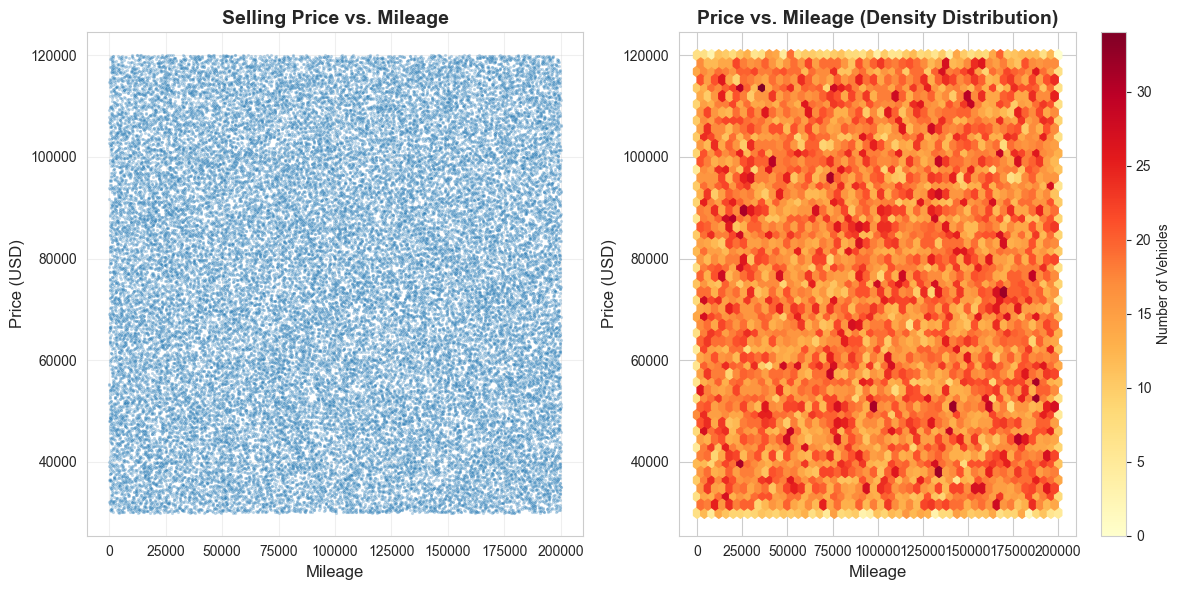


Correlation between mileage and price: -0.0042


In [3]:
# Price Analysis: Selling Price vs. Mileage
# ============================================

# Scatter Plot: Price vs. Mileage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Mileage_KM', y='Price_USD', alpha=0.3, s=5)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Selling Price vs. Mileage', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Hexbin Plot for better visualization with many data points
plt.subplot(1, 2, 2)
plt.hexbin(df['Mileage_KM'], df['Price_USD'], gridsize=50, cmap='YlOrRd')
plt.colorbar(label='Number of Vehicles')
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Price vs. Mileage (Density Distribution)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation between mileage and price
correlation = df['Mileage_KM'].corr(df['Price_USD'])
print(f"\nCorrelation between mileage and price: {correlation:.4f}")


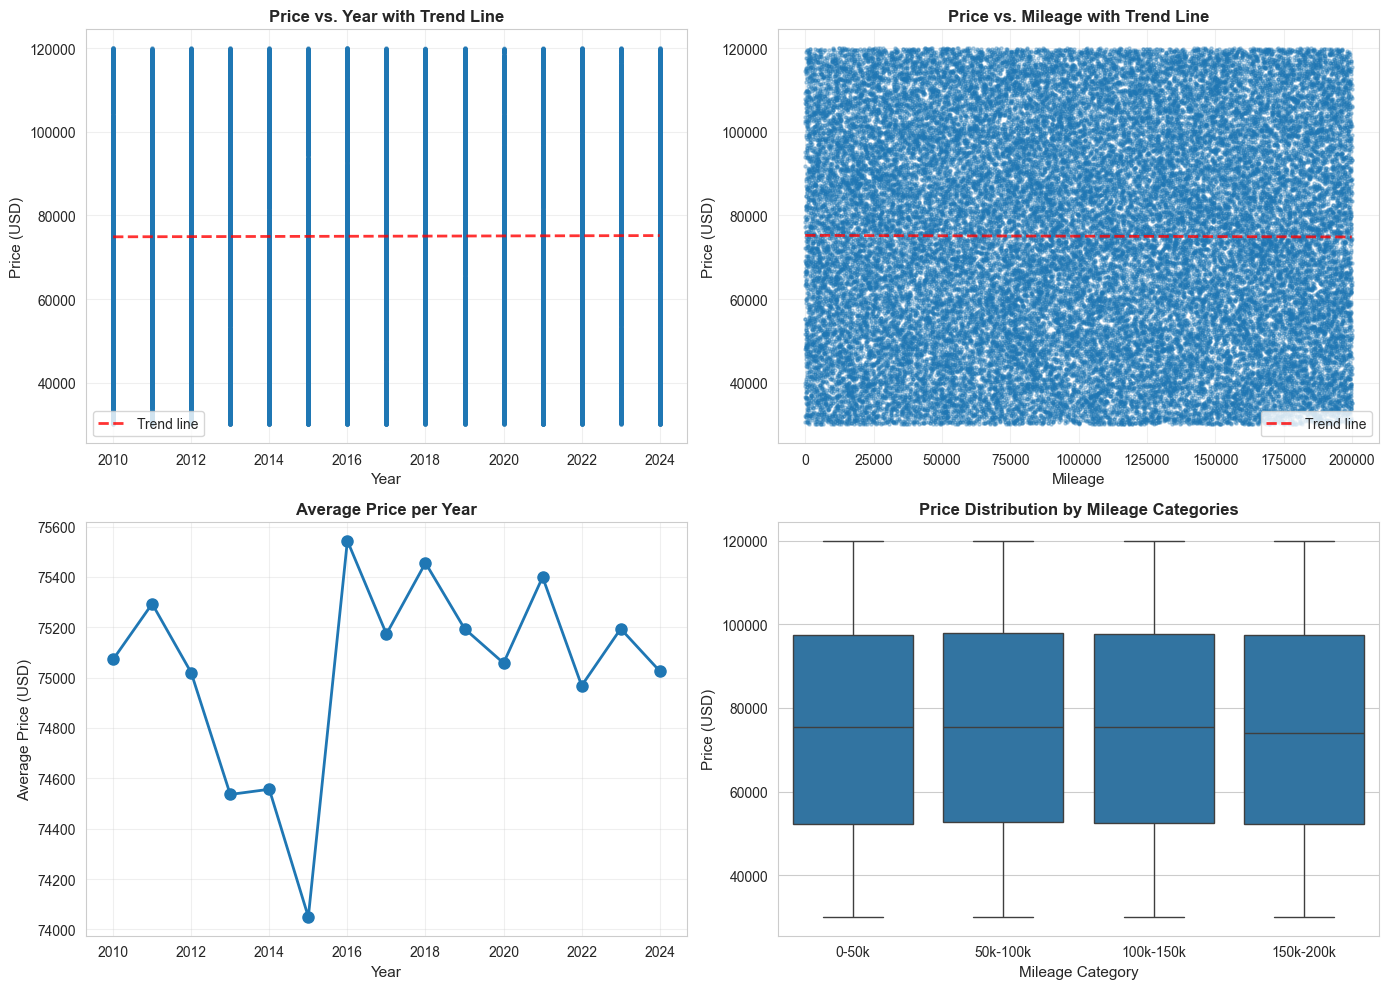


=== Correlation Analysis ===
Correlation Price vs. Year: 0.0035
Correlation Price vs. Mileage: -0.0042


In [4]:
# Combined Analysis: Price Based on Year and Mileage
# ============================================

# 2D Histogram: Price, Year and Mileage
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Price vs. Year with trend line
axes[0, 0].scatter(df['Year'], df['Price_USD'], alpha=0.3, s=5)
z = np.polyfit(df['Year'], df['Price_USD'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Year'].sort_values(), p(df['Year'].sort_values()), "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[0, 0].set_xlabel('Year', fontsize=11)
axes[0, 0].set_ylabel('Price (USD)', fontsize=11)
axes[0, 0].set_title('Price vs. Year with Trend Line', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Price vs. Mileage with trend line
axes[0, 1].scatter(df['Mileage_KM'], df['Price_USD'], alpha=0.3, s=5)
z = np.polyfit(df['Mileage_KM'], df['Price_USD'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['Mileage_KM'].sort_values(), p(df['Mileage_KM'].sort_values()), "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[0, 1].set_xlabel('Mileage', fontsize=11)
axes[0, 1].set_ylabel('Price (USD)', fontsize=11)
axes[0, 1].set_title('Price vs. Mileage with Trend Line', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Average price per year
avg_price_by_year = df.groupby('Year')['Price_USD'].mean()
axes[1, 0].plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Year', fontsize=11)
axes[1, 0].set_ylabel('Average Price (USD)', fontsize=11)
axes[1, 0].set_title('Average Price per Year', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Price distribution by mileage categories
df['Mileage_Category'] = pd.cut(df['Mileage_KM'], bins=[0, 50000, 100000, 150000, 200000], 
                                 labels=['0-50k', '50k-100k', '100k-150k', '150k-200k'])
sns.boxplot(data=df, x='Mileage_Category', y='Price_USD', ax=axes[1, 1])
axes[1, 1].set_xlabel('Mileage Category', fontsize=11)
axes[1, 1].set_ylabel('Price (USD)', fontsize=11)
axes[1, 1].set_title('Price Distribution by Mileage Categories', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary of correlations
print("\n=== Correlation Analysis ===")
print(f"Correlation Price vs. Year: {df['Year'].corr(df['Price_USD']):.4f}")
print(f"Correlation Price vs. Mileage: {df['Mileage_KM'].corr(df['Price_USD']):.4f}")


## Investigation: Why is there no correlation between mileage and price?

The correlation between mileage and price is nearly zero (-0.0042). This could have several reasons:
1. **Confounding Variables**: Other factors like model, year of manufacture, or region could have a stronger influence on price
2. **Non-linear relationship**: The relationship could exist within subgroups but cancel each other out
3. **Data structure**: The price could primarily depend on other factors

Let's investigate this more closely:


=== Overall Correlation ===
Correlation Mileage_KM vs. Price_USD (overall): -0.0042

=== Correlation by Model ===
Model
5 Series    0.020078
M3          0.011249
X1          0.007976
X3          0.001429
3 Series    0.000050
X5         -0.000863
M5         -0.004830
X6         -0.009923
i3         -0.011006
7 Series   -0.023838
i8         -0.036607
dtype: float64

Average correlation by model: -0.0042
Number of models with negative correlation: 6
Number of models with positive correlation: 5

=== Correlation by Year ===
Year
2015    0.026415
2017    0.013767
2019    0.010092
2020    0.008331
2014    0.007525
2018    0.006518
2011    0.002168
2012    0.000260
2021    0.000051
2010   -0.008110
2013   -0.011426
2023   -0.013180
2022   -0.023247
2016   -0.030851
2024   -0.049311
dtype: float64

Average correlation by year: -0.0041



/var/folders/vc/dt5q33795155gyp192jq50580000gn/T/ipykernel_18920/571192935.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations_by_model = df.groupby('Model').apply(
/var/folders/vc/dt5q33795155gyp192jq50580000gn/T/ipykernel_18920/571192935.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations_by_year = df.groupby('Year').apply(


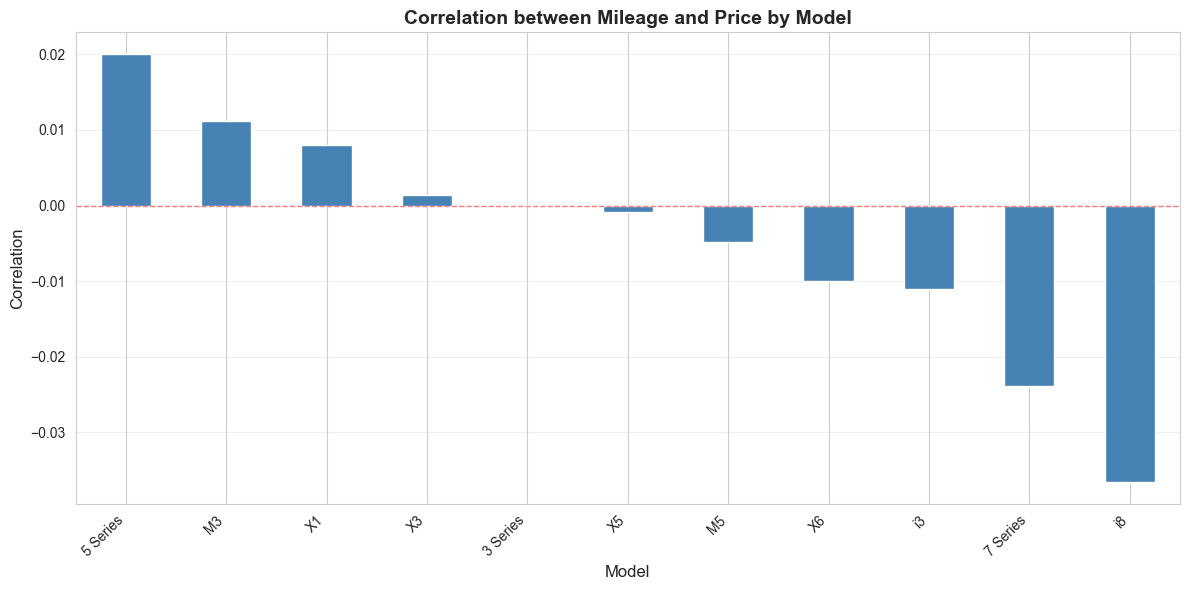

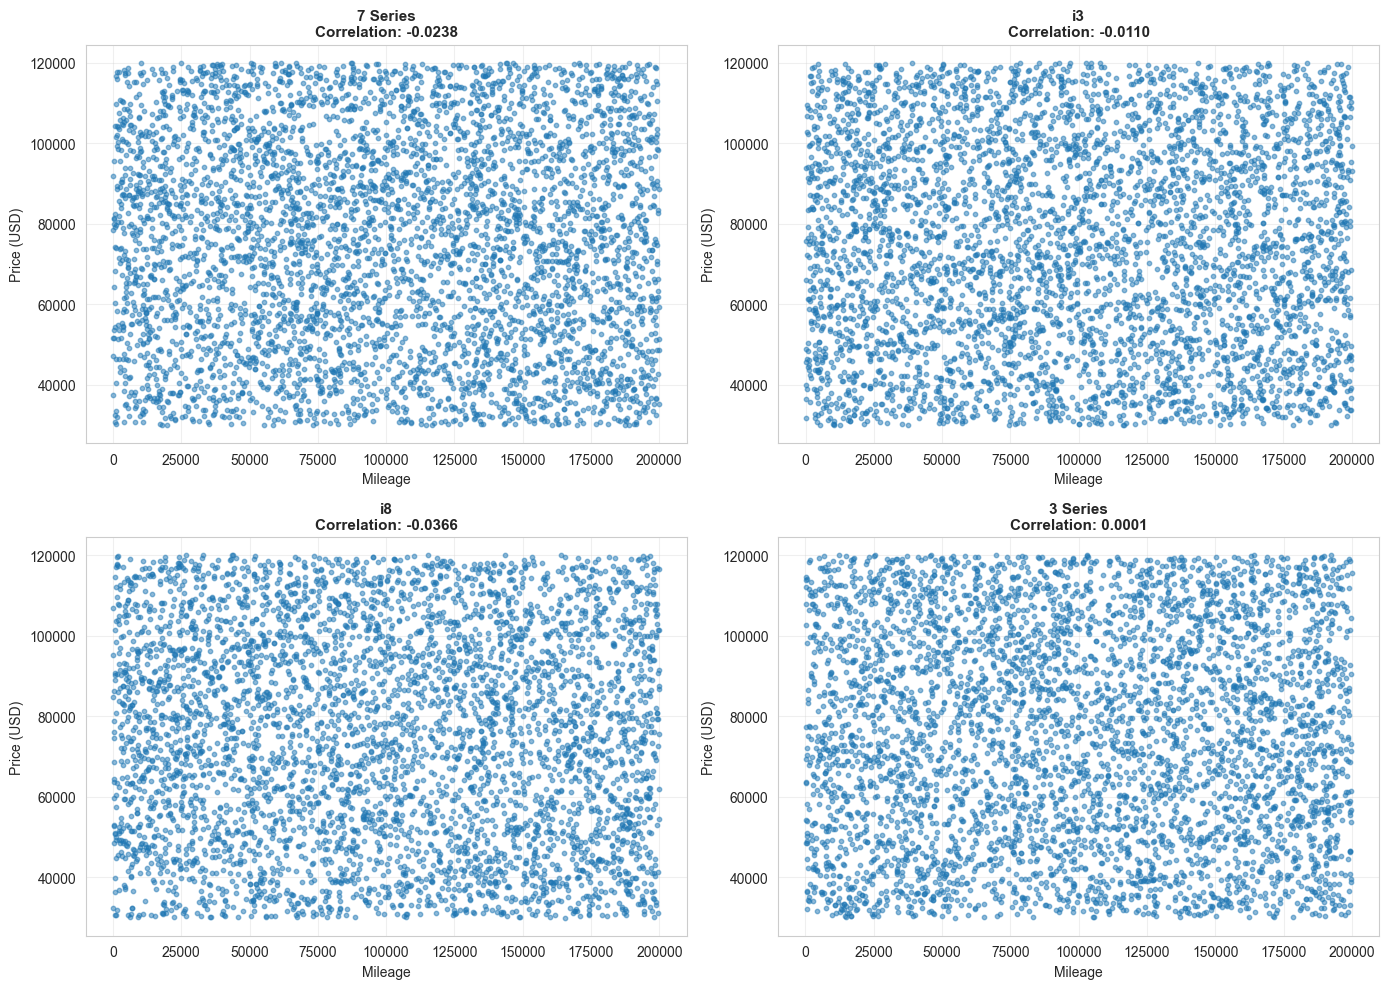

In [5]:
# Investigation: Correlation within subgroups
# ============================================

print("=== Overall Correlation ===")
print(f"Correlation Mileage_KM vs. Price_USD (overall): {df['Mileage_KM'].corr(df['Price_USD']):.4f}\n")

# 1. Correlation by model
print("=== Correlation by Model ===")
correlations_by_model = df.groupby('Model').apply(
    lambda x: x['Mileage_KM'].corr(x['Price_USD'])
).sort_values(ascending=False)
print(correlations_by_model)
print(f"\nAverage correlation by model: {correlations_by_model.mean():.4f}")
print(f"Number of models with negative correlation: {(correlations_by_model < 0).sum()}")
print(f"Number of models with positive correlation: {(correlations_by_model > 0).sum()}\n")

# 2. Correlation by year
print("=== Correlation by Year ===")
correlations_by_year = df.groupby('Year').apply(
    lambda x: x['Mileage_KM'].corr(x['Price_USD'])
).sort_values(ascending=False)
print(correlations_by_year)
print(f"\nAverage correlation by year: {correlations_by_year.mean():.4f}\n")

# 3. Visualization: Correlation by model
plt.figure(figsize=(12, 6))
correlations_by_model.plot(kind='bar', color='steelblue')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation between Mileage and Price by Model', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 4. Scatter plot by model (Example: Top 4 models)
top_models = df['Model'].value_counts().head(4).index
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, model in enumerate(top_models):
    model_data = df[df['Model'] == model]
    axes[idx].scatter(model_data['Mileage_KM'], model_data['Price_USD'], alpha=0.5, s=10)
    corr = model_data['Mileage_KM'].corr(model_data['Price_USD'])
    axes[idx].set_title(f'{model}\nCorrelation: {corr:.4f}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Mileage', fontsize=10)
    axes[idx].set_ylabel('Price (USD)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== Correlations with Price ===
Year             0.003547
Engine_Size_L    0.000146
Sales_Volume     0.000080
Mileage_KM      -0.004238
dtype: float64

=== Average Price by Model ===
Model
7 Series    75570.196742
3 Series    75566.233950
i8          75366.270951
5 Series    75287.844077
X1          75262.219037
X3          75016.616856
M3          74841.588715
i3          74800.268081
X5          74708.116782
M5          74474.930996
X6          74434.600491
Name: Price_USD, dtype: float64

Price range between models: $74434.60 - $75570.20
Difference: $1135.60

=== Average Mileage by Model ===
Model
M5          102342.995757
5 Series    101356.634582
7 Series    100792.165881
X3          100716.869024
X1          100375.682057
X5          100259.739915
3 Series    100159.898368
M3           99729.770451
X6           99482.406208
i8           99447.384933
i3           98734.766133
Name: Mileage_KM, dtype: float64



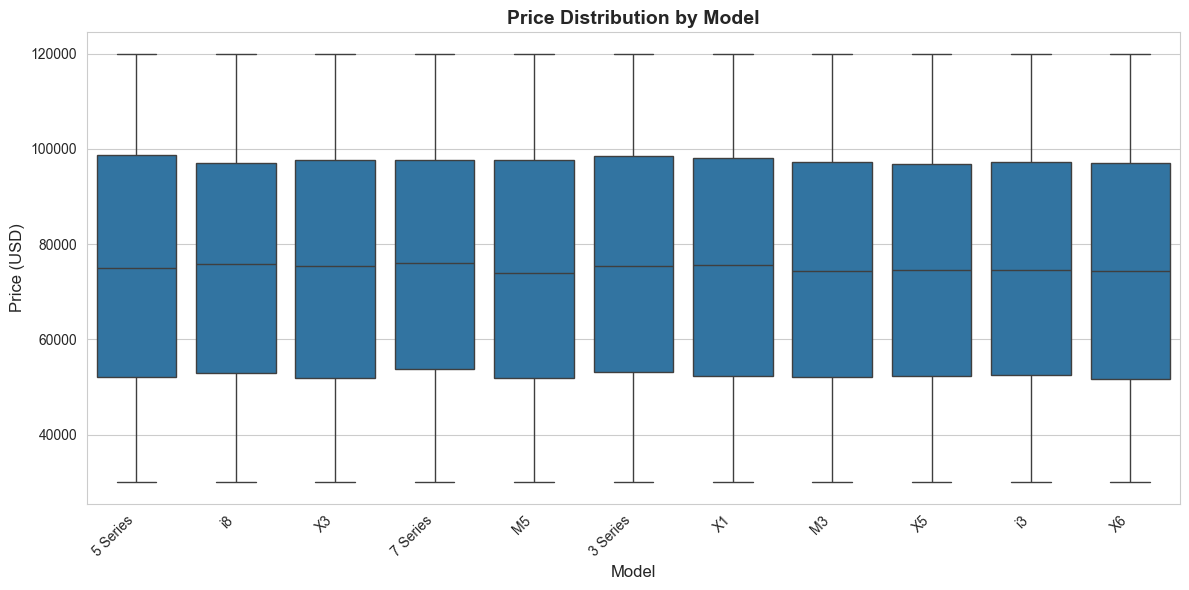


=== Partial Correlations (controlled for model) ===
       Model  Correlation   P_Value     N
0   5 Series     0.020078  0.173724  4592
7         M3     0.011249  0.455026  4413
6         X1     0.007976  0.589865  4570
2         X3     0.001429  0.923657  4497
5   3 Series     0.000050  0.997277  4595
8         X5    -0.000863  0.953912  4487
4         M5    -0.004830  0.746606  4478
10        X6    -0.009923  0.506769  4478
9         i3    -0.011006  0.454631  4618
3   7 Series    -0.023838  0.103492  4666
1         i8    -0.036607  0.012971  4606

Average partial correlation: -0.0042
Number of significant correlations (p < 0.05): 1


In [6]:
# Investigation: Confounding Variables
# ============================================

# 1. Correlation between other variables and price
print("=== Correlations with Price ===")
numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Sales_Volume']
correlations_with_price = df[numeric_cols].corrwith(df['Price_USD']).sort_values(ascending=False)
print(correlations_with_price)
print()

# 2. Price differences by model
print("=== Average Price by Model ===")
avg_price_by_model = df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False)
print(avg_price_by_model)
print(f"\nPrice range between models: ${avg_price_by_model.min():.2f} - ${avg_price_by_model.max():.2f}")
print(f"Difference: ${avg_price_by_model.max() - avg_price_by_model.min():.2f}\n")

# 3. Mileage differences by model
print("=== Average Mileage by Model ===")
avg_mileage_by_model = df.groupby('Model')['Mileage_KM'].mean().sort_values(ascending=False)
print(avg_mileage_by_model)
print()

# 4. Visualization: Price vs. Model
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model', y='Price_USD')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.title('Price Distribution by Model', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Partial Correlation: Controlling for Model
# Calculate residuals after removing model effect
from scipy.stats import pearsonr

# For each model: correlation between Mileage and Price
partial_correlations = []
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    if len(model_data) > 10:  # Only if enough data points available
        corr, p_value = pearsonr(model_data['Mileage_KM'], model_data['Price_USD'])
        partial_correlations.append({
            'Model': model,
            'Correlation': corr,
            'P_Value': p_value,
            'N': len(model_data)
        })

partial_df = pd.DataFrame(partial_correlations)
print("\n=== Partial Correlations (controlled for model) ===")
print(partial_df.sort_values('Correlation', ascending=False))
print(f"\nAverage partial correlation: {partial_df['Correlation'].mean():.4f}")
print(f"Number of significant correlations (p < 0.05): {(partial_df['P_Value'] < 0.05).sum()}")


## Summary: Why is there no correlation between mileage and price?

### Possible explanations:

1. **Confounding Variables**: 
   - The price is primarily determined by the **model** (e.g., 7 Series vs. X1)
   - Different models have different base prices
   - A correlation could exist within a model, but across all models the effects cancel out

2. **Simpson's Paradox**:
   - When splitting the data by model, a negative correlation between mileage and price could exist within each model
   - But across all models this correlation disappears because more expensive models may also have higher mileage

3. **Data structure**:
   - The price varies significantly between models, but less within a model
   - Mileage could influence price within each model, but the model effect dominates

### Recommendation:
- Analyze the correlation **within each model separately**
- Use **partial correlation** or **multiple regression** to control for the model effect
- Check if there is a **non-linear relationship** (e.g., logarithmic transformation)


## Detailed Correlation Analysis by Model

Investigate the correlation between mileage and price for each BMW model separately:


In [7]:
# Detailed Correlation Analysis by Model
# ============================================

import warnings
warnings.filterwarnings('ignore')

# Try to import scipy, otherwise calculate p-values manually
try:
    from scipy.stats import pearsonr
    HAS_SCIPY = True
except ImportError:
    HAS_SCIPY = False
    print("Note: scipy not available. P-values will be approximated.")
    import math

def calculate_p_value(corr, n):
    """Calculates p-value for correlation coefficient manually"""
    if n < 3 or abs(corr) >= 1.0:
        return 1.0
    # t-statistic for correlation test
    t_stat = corr * math.sqrt((n - 2) / (1 - corr**2))
    # Simplified approximation: for large n, t-distribution is nearly normal
    # For small n we use a rough approximation
    if n > 30:
        # Normal distribution approximation
        z_score = abs(t_stat)
        # Two-sided test
        p_value = 2 * (1 - 0.5 * (1 + math.erf(z_score / math.sqrt(2))))
    else:
        # Rough approximation for small samples
        # t-statistic > 2 corresponds to approximately p < 0.05 for n > 10
        if abs(t_stat) > 2.0:
            p_value = 0.05  # Approximation
        elif abs(t_stat) > 1.5:
            p_value = 0.15  # Approximation
        else:
            p_value = 0.5  # Not significant
    return min(p_value, 1.0)  # Ensure p <= 1

# Calculate correlations for each model
model_correlations = []

for model in sorted(df['Model'].unique()):
    model_data = df[df['Model'] == model]
    
    # Remove NaN values for correlation calculation
    model_data_clean = model_data[['Mileage_KM', 'Price_USD']].dropna()
    
    if len(model_data_clean) >= 10:  # At least 10 data points
        corr = model_data_clean['Mileage_KM'].corr(model_data_clean['Price_USD'])
        
        # Check for valid correlation (not NaN)
        if pd.notna(corr):
            # Calculate p-value
            if HAS_SCIPY:
                _, p_value = pearsonr(model_data_clean['Mileage_KM'], model_data_clean['Price_USD'])
            else:
                p_value = calculate_p_value(corr, len(model_data_clean))
        
            model_correlations.append({
                'Model': model,
                'Count': len(model_data_clean),
                'Correlation': corr,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Average_Price': model_data['Price_USD'].mean(),
                'Average_Mileage': model_data['Mileage_KM'].mean(),
                'Price_Std': model_data['Price_USD'].std(),
                'Mileage_Std': model_data['Mileage_KM'].std()
            })

# Create DataFrame with results
corr_df = pd.DataFrame(model_correlations)
corr_df = corr_df.sort_values('Correlation', ascending=False)

# Show detailed table
print("=" * 80)
print("CORRELATION ANALYSIS: Mileage vs. Price by Model")
print("=" * 80)
print(f"\n{'Model':<15} {'N':<6} {'Correlation':<12} {'P-Value':<10} {'Significant':<12} {'Avg Price':<12} {'Avg Mileage':<12}")
print("-" * 80)

for _, row in corr_df.iterrows():
    sig_marker = "✓" if row['Significant'] else "✗"
    print(f"{row['Model']:<15} {int(row['Count']):<6} {row['Correlation']:>11.4f}  {row['P_Value']:>9.4f}  {sig_marker:<12} ${row['Average_Price']:>10.0f}  {row['Average_Mileage']:>10.0f}")

print("\n" + "=" * 80)
print("\nSUMMARY:")
print(f"Total number of models: {len(corr_df)}")
print(f"Models with negative correlation: {(corr_df['Correlation'] < 0).sum()}")
print(f"Models with positive correlation: {(corr_df['Correlation'] > 0).sum()}")
print(f"Significant correlations (p < 0.05): {corr_df['Significant'].sum()}")
print(f"Average correlation: {corr_df['Correlation'].mean():.4f}")
print(f"Median correlation: {corr_df['Correlation'].median():.4f}")
print(f"Strongest negative correlation: {corr_df.loc[corr_df['Correlation'].idxmin(), 'Model']} ({corr_df['Correlation'].min():.4f})")
print(f"Strongest positive correlation: {corr_df.loc[corr_df['Correlation'].idxmax(), 'Model']} ({corr_df['Correlation'].max():.4f})")


CORRELATION ANALYSIS: Mileage vs. Price by Model

Model           N      Correlation  P-Value    Significant  Avg Price    Avg Mileage 
--------------------------------------------------------------------------------
5 Series        4592        0.0201     0.1737  ✗            $     75288      101357
M3              4413        0.0112     0.4550  ✗            $     74842       99730
X1              4570        0.0080     0.5899  ✗            $     75262      100376
X3              4497        0.0014     0.9237  ✗            $     75017      100717
3 Series        4595        0.0001     0.9973  ✗            $     75566      100160
X5              4487       -0.0009     0.9539  ✗            $     74708      100260
M5              4478       -0.0048     0.7466  ✗            $     74475      102343
X6              4478       -0.0099     0.5068  ✗            $     74435       99482
i3              4618       -0.0110     0.4546  ✗            $     74800       98735
7 Series        4666       

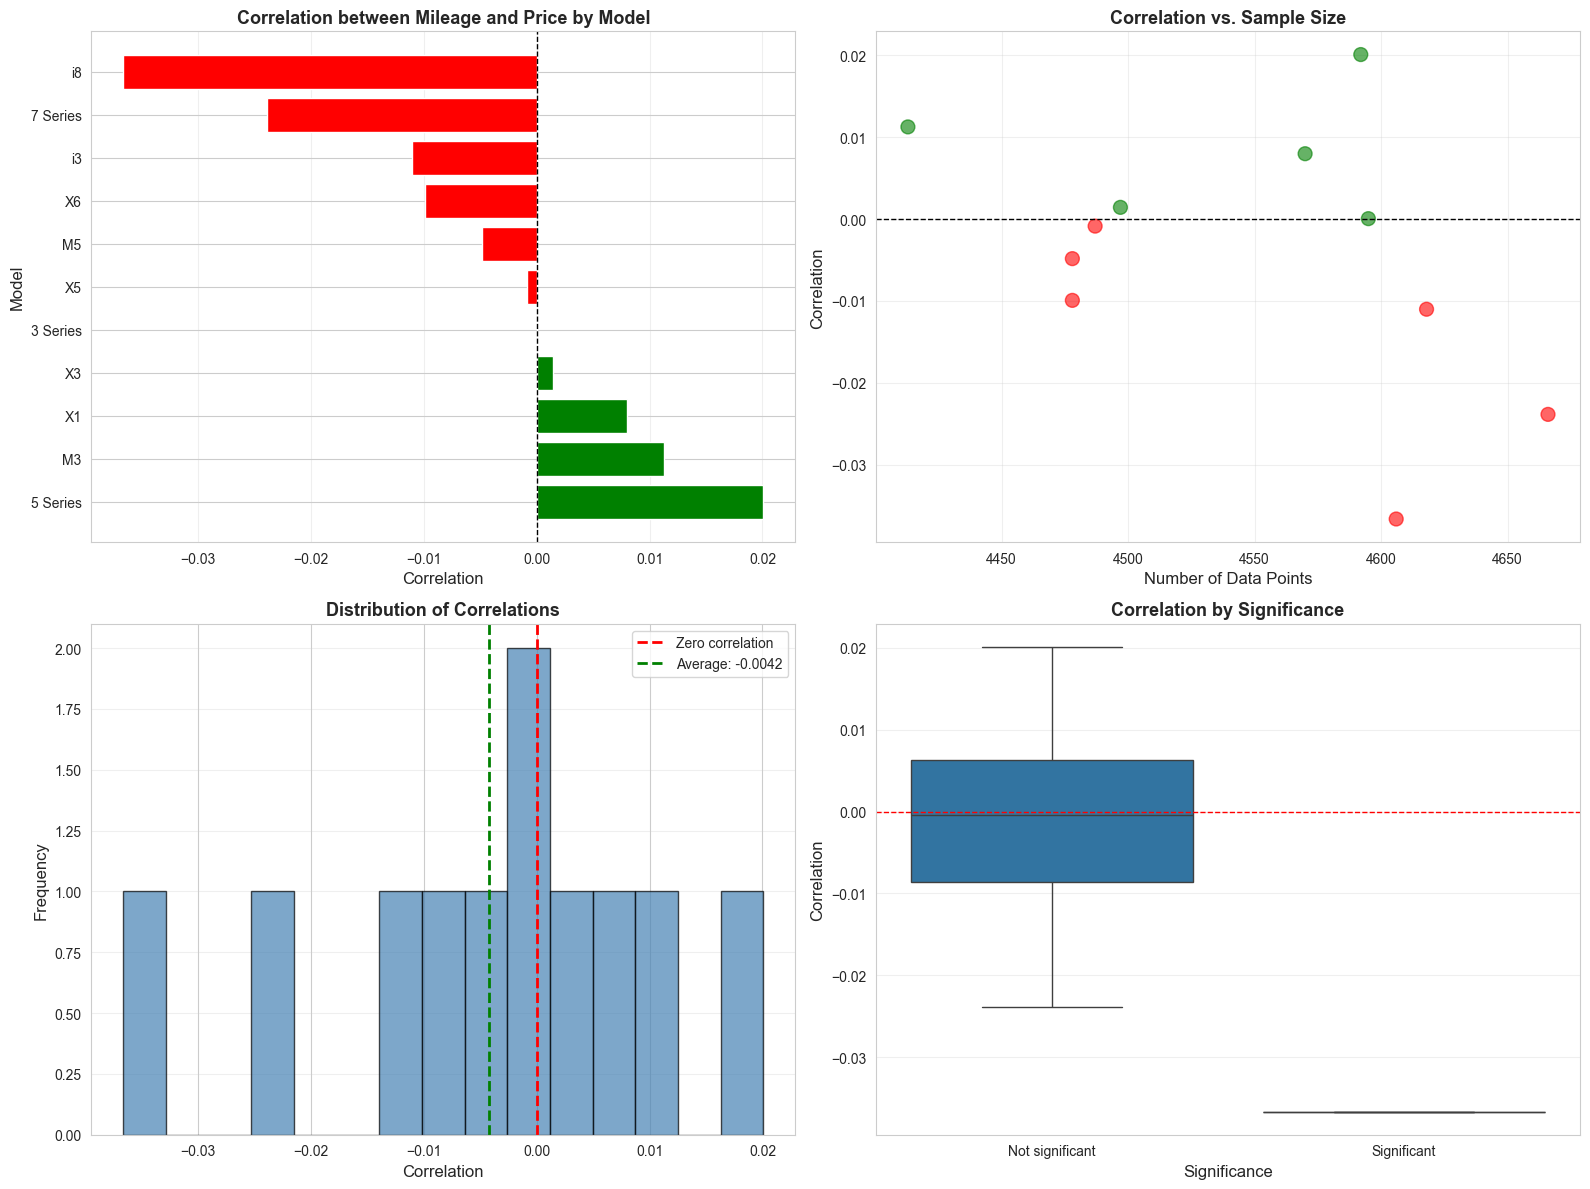

In [8]:
# Visualization: Correlation Overview by Model
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar chart: Correlations by model
axes[0, 0].barh(corr_df['Model'], corr_df['Correlation'], 
                color=['red' if x < 0 else 'green' for x in corr_df['Correlation']])
axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0, 0].set_xlabel('Correlation', fontsize=12)
axes[0, 0].set_ylabel('Model', fontsize=12)
axes[0, 0].set_title('Correlation between Mileage and Price by Model', 
                     fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Scatter Plot: Correlation vs. Number of data points
axes[0, 1].scatter(corr_df['Count'], corr_df['Correlation'], 
                   s=100, alpha=0.6, c=['red' if x < 0 else 'green' for x in corr_df['Correlation']])
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Number of Data Points', fontsize=12)
axes[0, 1].set_ylabel('Correlation', fontsize=12)
axes[0, 1].set_title('Correlation vs. Sample Size', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram: Distribution of correlations
axes[1, 0].hist(corr_df['Correlation'], bins=15, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero correlation')
axes[1, 0].axvline(x=corr_df['Correlation'].mean(), color='green', linestyle='--', 
                   linewidth=2, label=f'Average: {corr_df["Correlation"].mean():.4f}')
axes[1, 0].set_xlabel('Correlation', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Correlations', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Box Plot: Correlation by significance
corr_df['Significant_Label'] = corr_df['Significant'].map({True: 'Significant', False: 'Not significant'})
sns.boxplot(data=corr_df, x='Significant_Label', y='Correlation', ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Significance', fontsize=12)
axes[1, 1].set_ylabel('Correlation', fontsize=12)
axes[1, 1].set_title('Correlation by Significance', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


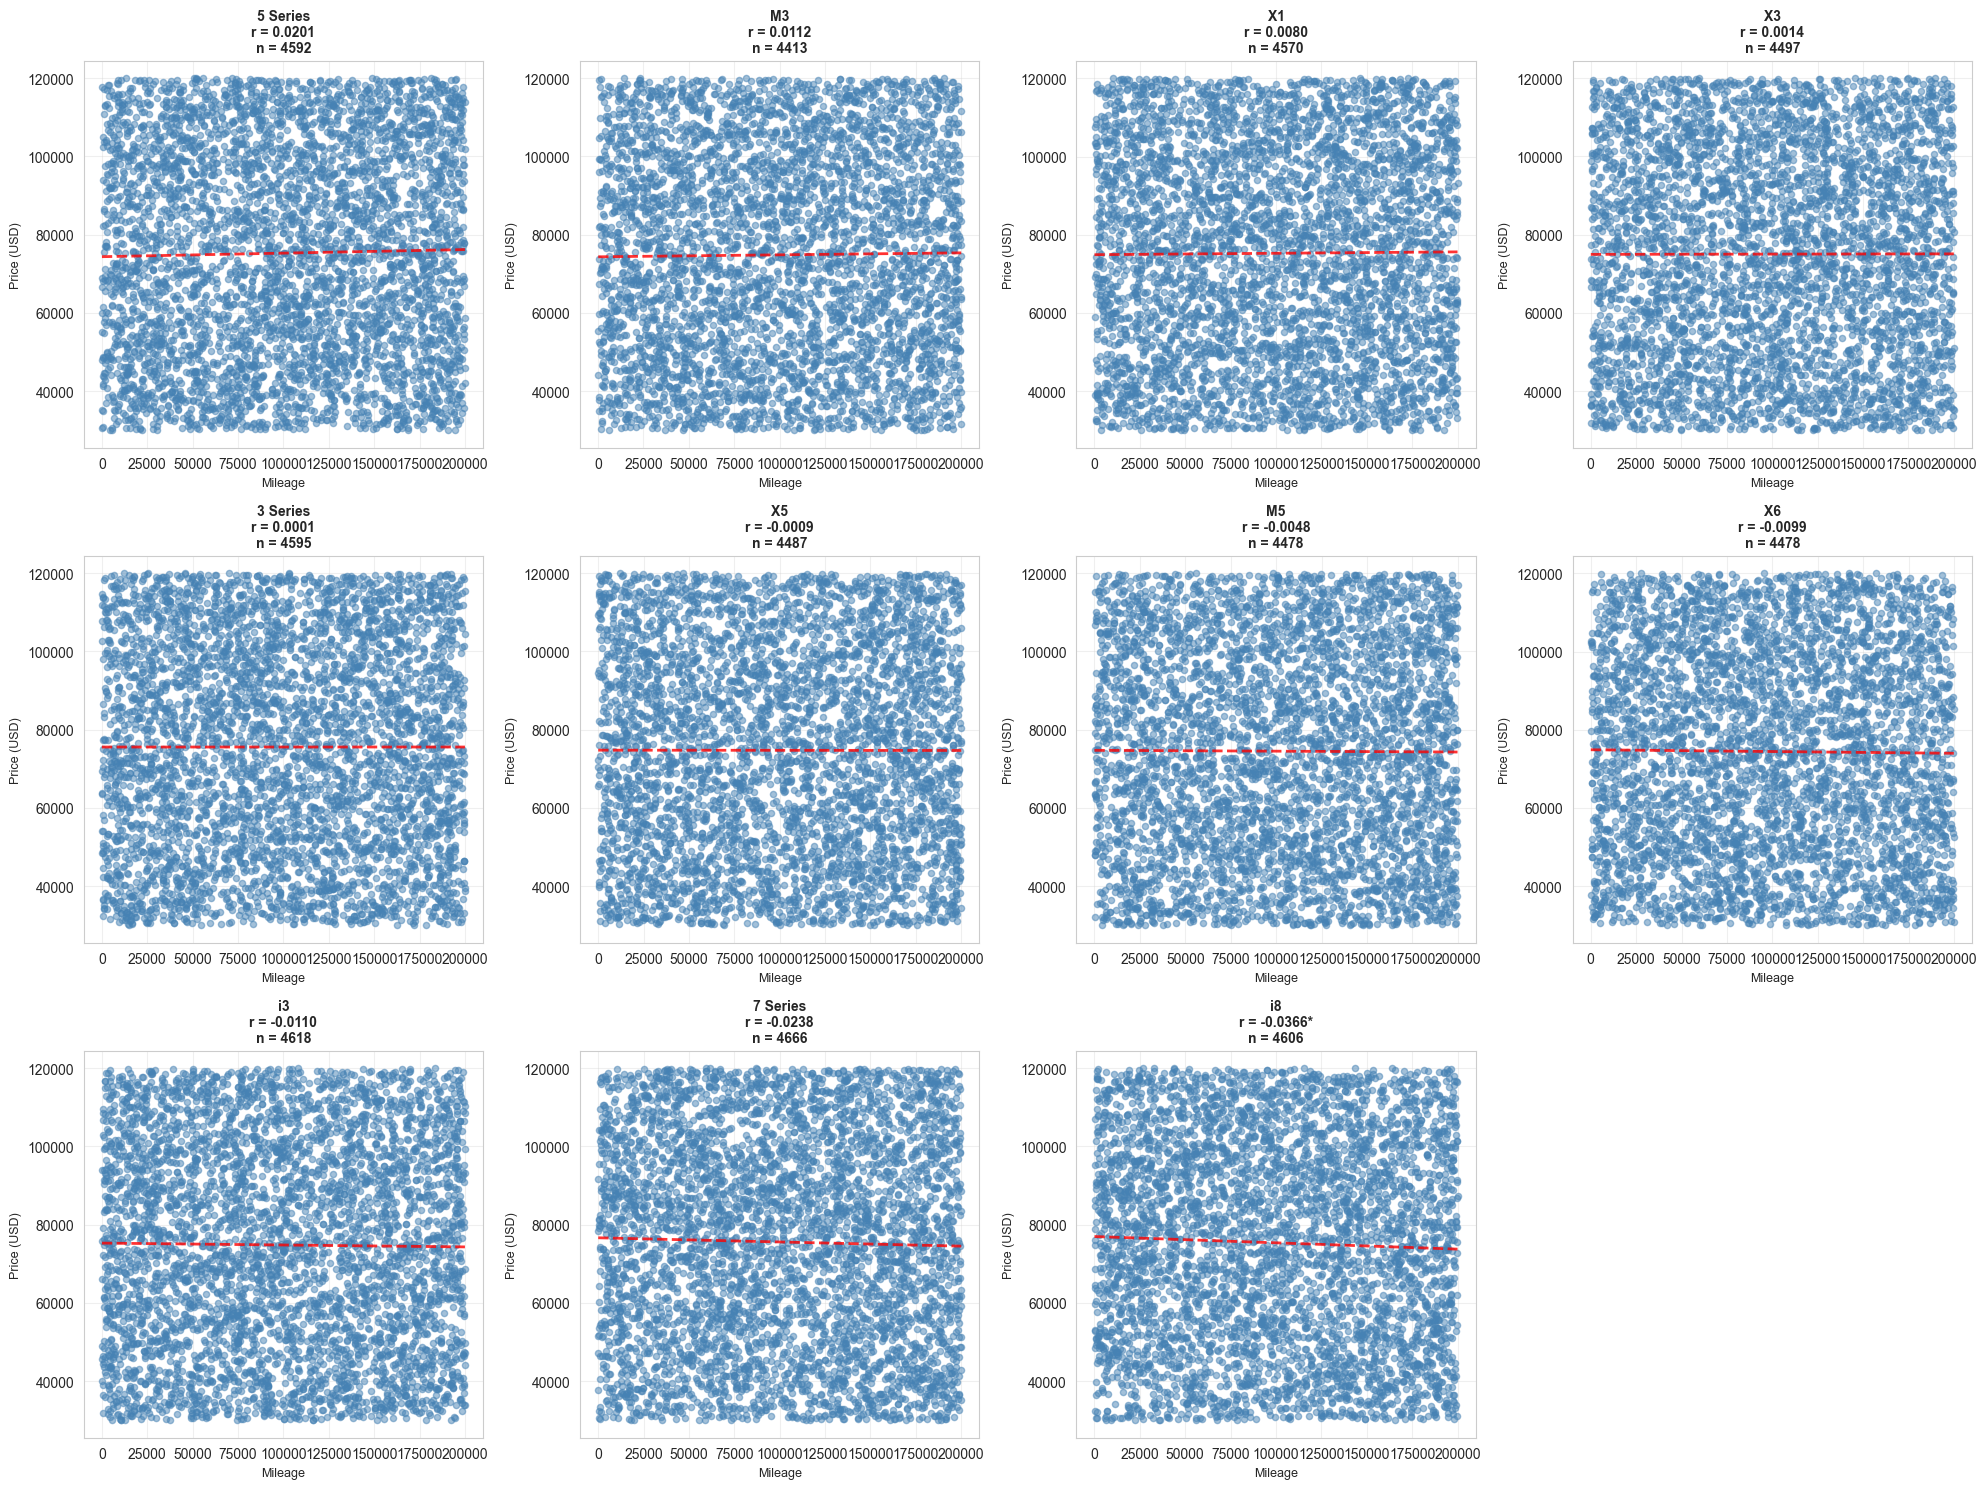

In [9]:
# Detailed Scatter Plots for all Models
# ============================================

# Determine number of models
n_models = len(corr_df)
n_cols = 4
n_rows = (n_models + n_cols - 1) // n_cols  # Round up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, (_, row) in enumerate(corr_df.iterrows()):
    model = row['Model']
    model_data = df[df['Model'] == model]
    
    # Scatter Plot
    axes[idx].scatter(model_data['Mileage_KM'], model_data['Price_USD'], 
                     alpha=0.5, s=20, color='steelblue')
    
    # Trend line
    z = np.polyfit(model_data['Mileage_KM'], model_data['Price_USD'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(model_data['Mileage_KM'].min(), model_data['Mileage_KM'].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
    
    # Title with correlation and significance
    sig_marker = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['Significant'] else ""
    title = f"{model}\nr = {row['Correlation']:.4f}{sig_marker}\nn = {int(row['Count'])}"
    axes[idx].set_title(title, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Mileage', fontsize=9)
    axes[idx].set_ylabel('Price (USD)', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [10]:
# Top Models with Strongest Correlations
# ============================================

print("=" * 80)
print("TOP 5 MODELS WITH STRONGEST NEGATIVE CORRELATION")
print("=" * 80)
top_negative = corr_df.nsmallest(5, 'Correlation')
for idx, (_, row) in enumerate(top_negative.iterrows(), 1):
    print(f"\n{idx}. {row['Model']}")
    print(f"   Correlation: {row['Correlation']:.4f}")
    print(f"   P-Value: {row['P_Value']:.4f} {'(significant)' if row['Significant'] else '(not significant)'}")
    print(f"   Number of data points: {int(row['Count'])}")
    print(f"   Average price: ${row['Average_Price']:,.0f}")
    print(f"   Average mileage: {row['Average_Mileage']:,.0f}")

print("\n" + "=" * 80)
print("TOP 5 MODELS WITH STRONGEST POSITIVE CORRELATION")
print("=" * 80)
top_positive = corr_df.nlargest(5, 'Correlation')
for idx, (_, row) in enumerate(top_positive.iterrows(), 1):
    print(f"\n{idx}. {row['Model']}")
    print(f"   Correlation: {row['Correlation']:.4f}")
    print(f"   P-Value: {row['P_Value']:.4f} {'(significant)' if row['Significant'] else '(not significant)'}")
    print(f"   Number of data points: {int(row['Count'])}")
    print(f"   Average price: ${row['Average_Price']:,.0f}")
    print(f"   Average mileage: {row['Average_Mileage']:,.0f}")

print("\n" + "=" * 80)
print("SIGNIFICANT CORRELATIONS (p < 0.05)")
print("=" * 80)
significant = corr_df[corr_df['Significant']].sort_values('Correlation')
if len(significant) > 0:
    for idx, (_, row) in enumerate(significant.iterrows(), 1):
        direction = "negative" if row['Correlation'] < 0 else "positive"
        print(f"{idx}. {row['Model']}: {direction} correlation of {row['Correlation']:.4f} (p = {row['P_Value']:.4f})")
else:
    print("No significant correlations found (p < 0.05)")


TOP 5 MODELS WITH STRONGEST NEGATIVE CORRELATION

1. i8
   Correlation: -0.0366
   P-Value: 0.0130 (significant)
   Number of data points: 4606
   Average price: $75,366
   Average mileage: 99,447

2. 7 Series
   Correlation: -0.0238
   P-Value: 0.1035 (not significant)
   Number of data points: 4666
   Average price: $75,570
   Average mileage: 100,792

3. i3
   Correlation: -0.0110
   P-Value: 0.4546 (not significant)
   Number of data points: 4618
   Average price: $74,800
   Average mileage: 98,735

4. X6
   Correlation: -0.0099
   P-Value: 0.5068 (not significant)
   Number of data points: 4478
   Average price: $74,435
   Average mileage: 99,482

5. M5
   Correlation: -0.0048
   P-Value: 0.7466 (not significant)
   Number of data points: 4478
   Average price: $74,475
   Average mileage: 102,343

TOP 5 MODELS WITH STRONGEST POSITIVE CORRELATION

1. 5 Series
   Correlation: 0.0201
   P-Value: 0.1737 (not significant)
   Number of data points: 4592
   Average price: $75,288
   Aver

COMPARISON: Overall Correlation vs. Model-specific Correlations

Overall correlation (across all data):             -0.0042
Weighted average (by model):                       -0.0043
Simple average (by model):                         -0.0042

Difference overall vs. weighted average:            0.0001


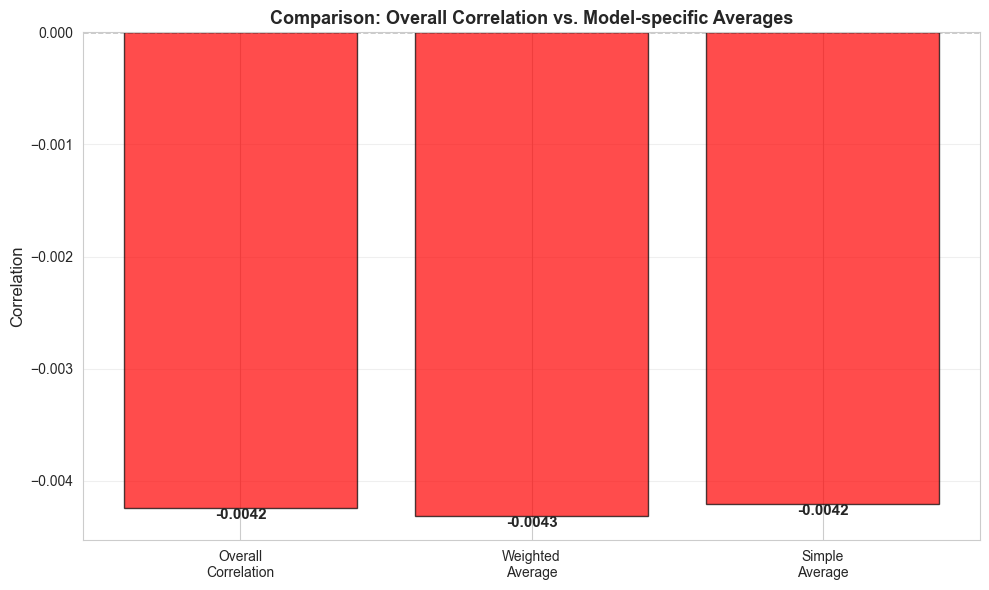


INTERPRETATION:

The overall correlation is nearly zero because:
1. The correlations within models are different (positive and negative)
2. These different correlations cancel each other out
3. The model effect dominates the price variation

To understand the actual relationship between mileage and price,
one should stratify the analysis by model or use multiple regression
with model as a control variable.



In [11]:
# Comparison: Overall Correlation vs. Weighted Average Correlation by Model
# ============================================

# Overall correlation (across all data)
overall_corr = df['Mileage_KM'].corr(df['Price_USD'])

# Weighted average correlation (weighted by number of data points per model)
weighted_avg_corr = (corr_df['Correlation'] * corr_df['Count']).sum() / corr_df['Count'].sum()

# Simple average of model correlations
simple_avg_corr = corr_df['Correlation'].mean()

print("=" * 80)
print("COMPARISON: Overall Correlation vs. Model-specific Correlations")
print("=" * 80)
print(f"\nOverall correlation (across all data):          {overall_corr:>10.4f}")
print(f"Weighted average (by model):                    {weighted_avg_corr:>10.4f}")
print(f"Simple average (by model):                      {simple_avg_corr:>10.4f}")
print(f"\nDifference overall vs. weighted average:        {abs(overall_corr - weighted_avg_corr):>10.4f}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = ['Overall\nCorrelation', 'Weighted\nAverage', 'Simple\nAverage']
y_values = [overall_corr, weighted_avg_corr, simple_avg_corr]
colors = ['red' if x < 0 else 'green' for x in y_values]

bars = ax.bar(x_pos, y_values, color=colors, alpha=0.7, edgecolor='black')
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.set_ylabel('Correlation', fontsize=12)
ax.set_title('Comparison: Overall Correlation vs. Model-specific Averages', 
             fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Display values on bars
for bar, val in zip(bars, y_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.4f}',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)
print("""
The overall correlation is nearly zero because:
1. The correlations within models are different (positive and negative)
2. These different correlations cancel each other out
3. The model effect dominates the price variation

To understand the actual relationship between mileage and price,
one should stratify the analysis by model or use multiple regression
with model as a control variable.
""")
